In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data and the head
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# renaming the columns
input_features = ['Wins', 'Runs', 'At_Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks', 'Strikeouts', 'Stolen_Bases', 
    'Runs_Allowed', 'Earned_Runs', 'Earned_Run_Average', 'Complete_games', 'Shutouts', 'Saves', 'Errors']

In [4]:
df.columns = input_features

In [5]:
# Checking the head after changing the columns
df.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average,Complete_games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Performing Analysis

In [6]:
# Checking the length of the data
len(df)

30

In [7]:
# Checking for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At_Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen_Bases        30 non-null     int64  
 10  Runs_Allowed        30 non-null     int64  
 11  Earned_Runs         30 non-null     int64  
 12  Earned_Run_Average  30 non-null     float64
 13  Complete_games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

In [8]:
# CHecking for statistical information
df.describe()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average,Complete_games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
# Checking for null values
df.isnull().sum()

Wins                  0
Runs                  0
At_Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen_Bases          0
Runs_Allowed          0
Earned_Runs           0
Earned_Run_Average    0
Complete_games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

<AxesSubplot:>

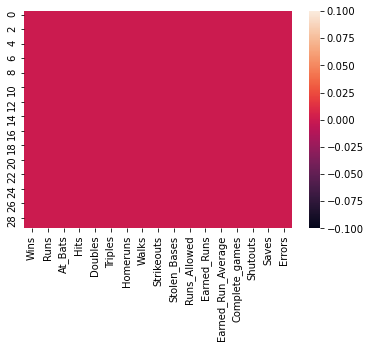

In [10]:
# Checking for null values through visualization
sns.heatmap(df.isnull())

In [11]:
# Print out the average wins (W) per year. You can use the mean() method for this.
print(df['Wins'].mean())

80.96666666666667


In [12]:
# Creating bins for the win column
def assign_win_bins(Wins):
    if Wins < 50:
        return 1
    if Wins >= 50 and Wins <= 69:
        return 2
    if Wins >= 70 and Wins <= 89:
        return 3
    if Wins >= 90 and Wins <= 109:
        return 4
    if Wins >= 110:
        return 5

In [13]:
df['win_bins'] = df['Wins'].apply(assign_win_bins)
df['win_bins']

0     4
1     3
2     3
3     3
4     3
5     4
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    2
15    4
16    4
17    4
18    2
19    2
20    4
21    3
22    3
23    2
24    2
25    4
26    3
27    3
28    3
29    2
Name: win_bins, dtype: int64

Text(0.5, 1.0, 'Distribution of Wins')

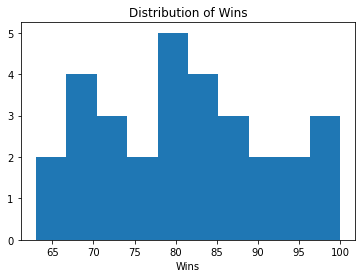

In [14]:
# Plotting distribution of wins
plt.hist(df['Wins'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

In [15]:
# Checking for correlation
df.corr()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average,Complete_games,Shutouts,Saves,Errors,win_bins
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485,0.917736
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.337668
At_Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.063131
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.072620
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.394036
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.218563
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.235563
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.397610
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.096319
Stolen_Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157089


<AxesSubplot:>

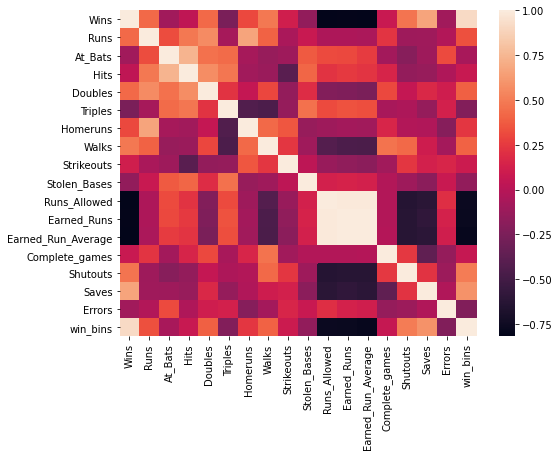

In [16]:
# Plotting correlation within the features
plt.figure (figsize= (8,6))
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Wins', ylabel='Saves'>

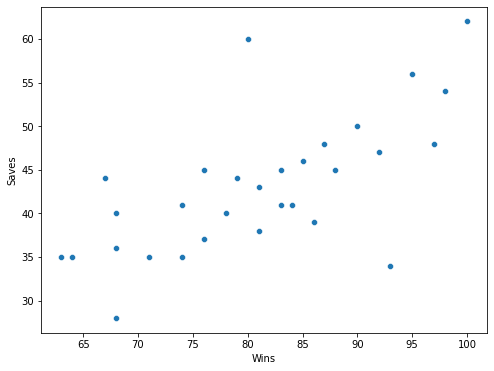

In [17]:
# checking for linear relations
plt.figure (figsize= (8,6))
sns.scatterplot(x = 'Wins', y = 'Saves', data = df)

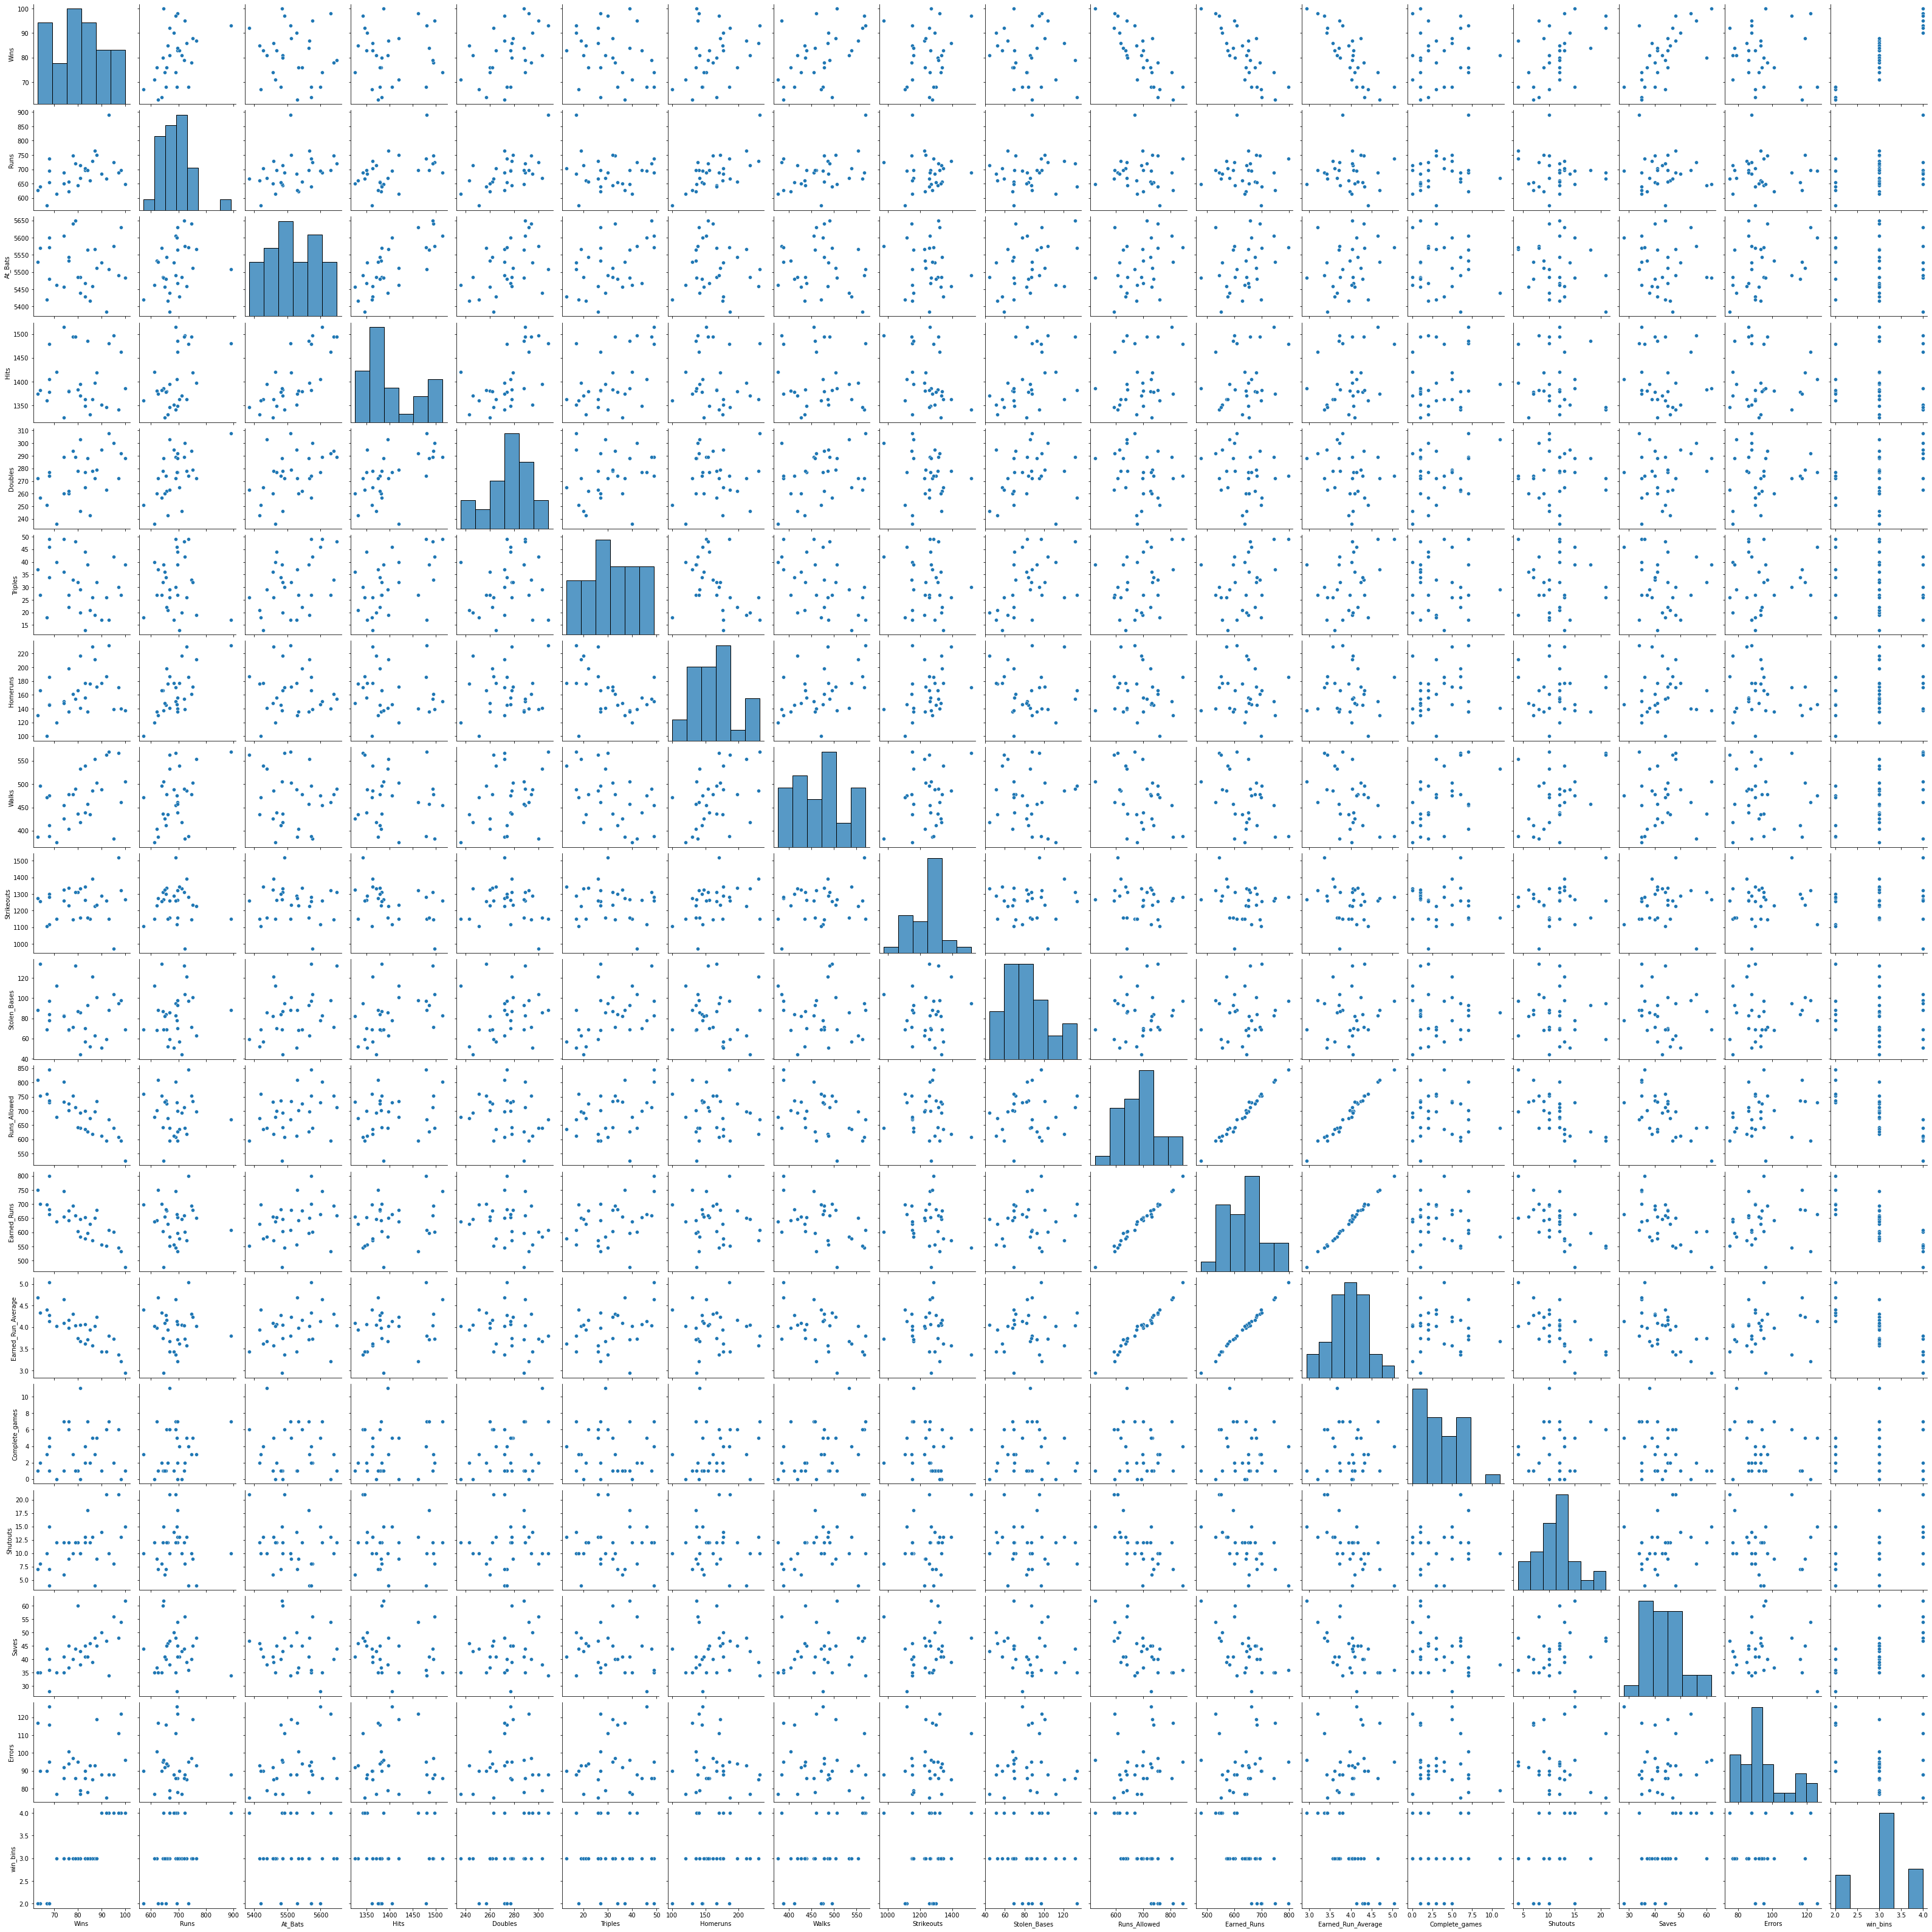

In [18]:
sns.pairplot(df)

In [19]:
# Checking columns
df.columns

Index(['Wins', 'Runs', 'At_Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs',
       'Earned_Run_Average', 'Complete_games', 'Shutouts', 'Saves', 'Errors',
       'win_bins'],
      dtype='object')

# Creating input & Output variables to perform predictions

In [20]:
# Creating input variable as the columns are very positively correlated
x = df[['Runs_Allowed', 'Earned_Runs',
       'Earned_Run_Average']]

In [21]:
# Creating target variable
y = df['Wins']

# Performing train-test and further predictions

In [22]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [23]:
from sklearn.linear_model import LinearRegression
logmodel = LinearRegression()
logmodel.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = logmodel.predict(x_test)

In [25]:
y_pred

array([87.69371682, 69.51776618, 75.87881186, 75.81711032, 83.8626194 ,
       79.42247545])

In [26]:
y_test

11    86
23    67
10    88
19    64
2     81
1     83
Name: Wins, dtype: int64

In [27]:
logmodel.coef_

array([ -0.10262748,   0.38146078, -61.50822128])

In [28]:
logmodel.intercept_

152.50628725879346

In [29]:
from sklearn.metrics import mean_squared_error
print(f'mean squared error : {mean_squared_error(y_pred, y_test)}')

mean squared error : 52.794732220629335


In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [31]:
print("R2 score : %.2f" % r2_score(y_test,y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Mean absolute error : %.2f" % mean_absolute_error(y_test, y_pred))

R2 score : 0.38
Mean squared error: 52.79
Mean absolute error : 5.76


# End of EDA